---
title: "Module 04: Lab 01"
subtitle: "Visual Reporting and Storytelling"
author: "Yuxuan Chen"
number-sections: true
date: "2025-3-20"
date-modified: today
date-format: long
engine: jupyter
categories: ["visualization","plotly","spark","Visual Reporting","Storytelling with Data","Industry-Specific Visualization",]
execute:
  eval: false #false 不运行  true 运行
  echo: true  #显示代码
---

# Objectives {.unnumbered}

By the end of this lab, you will:
1. Load and analyze the **Lightcast dataset** in **Spark DataFrame**.
2. Create **five easy and three medium-complexity visualizations** using **Plotly**.
3. Explore **salary distributions, employment trends, and job postings**.
4. Analyze **skills in relation to NAICS/SOC/ONET codes and salaries**.
5. Customize **colors, fonts, and styles** in all visualizations (**default themes result in a 2.5-point deduction**).
6. Follow **best practices for reporting on data communication**.

# Step 1: Load the Dataset {.unnumbered}


In [1]:
import pandas as pd
import plotly.express as px
import plotly.io as pio
pio.renderers.default = "vscode"
from pyspark.sql import SparkSession
from pyspark.sql.functions import split, explode, col, regexp_replace, transform


# Initialize Spark Session
spark = SparkSession.builder.appName("LightcastData").getOrCreate()

# Load Data
df = spark.read.option("header", "true").option("inferSchema", "true").option("multiLine","true").option("escape", "\"").csv("./data/lightcast_job_postings.csv")

# Show Schema and Sample Data
df.printSchema()
df.show(5)


your 131072x1 screen size is bogus. expect trouble


25/03/21 15:13:54 WARN Utils: Your hostname, DESKTOP-AEE21PF resolves to a loopback address: 127.0.1.1; using 192.168.167.208 instead (on interface eth0)
25/03/21 15:13:54 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address


Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).


25/03/21 15:13:56 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable


root
 |-- ID: string (nullable = true)
 |-- LAST_UPDATED_DATE: string (nullable = true)
 |-- LAST_UPDATED_TIMESTAMP: timestamp (nullable = true)
 |-- DUPLICATES: integer (nullable = true)
 |-- POSTED: string (nullable = true)
 |-- EXPIRED: string (nullable = true)
 |-- DURATION: integer (nullable = true)
 |-- SOURCE_TYPES: string (nullable = true)
 |-- SOURCES: string (nullable = true)
 |-- URL: string (nullable = true)
 |-- ACTIVE_URLS: string (nullable = true)
 |-- ACTIVE_SOURCES_INFO: string (nullable = true)
 |-- TITLE_RAW: string (nullable = true)
 |-- BODY: string (nullable = true)
 |-- MODELED_EXPIRED: string (nullable = true)
 |-- MODELED_DURATION: integer (nullable = true)
 |-- COMPANY: integer (nullable = true)
 |-- COMPANY_NAME: string (nullable = true)
 |-- COMPANY_RAW: string (nullable = true)
 |-- COMPANY_IS_STAFFING: boolean (nullable = true)
 |-- EDUCATION_LEVELS: string (nullable = true)
 |-- EDUCATION_LEVELS_NAME: string (nullable = true)
 |-- MIN_EDULEVELS: integer (

# Salary Distribution by Employment Type
- Identify salary trends across different employment types.
- **Filter the dataset**
  - Remove records where **salary is missing or zero**.
- **Aggregate Data**
  - Group by **employment type** and compute salary distribution.
- **Visualize results**
  - Create a **box plot** where:
    - **X-axis** = `EMPLOYMENT_TYPE_NAME`
    - **Y-axis** = `SALARY_FROM`
  - Customize **colors, fonts, and styles** to avoid a **2.5-point deduction**.
- **Explanation:** Write two sentences about what the graph reveals.



In [ ]:
# Your Code for 1st question here
df = df.filter((col("SALARY_FROM").isNotNull()) & (col("SALARY_FROM") > 0))

pdf = df.select("EMPLOYMENT_TYPE_NAME", "SALARY").toPandas()
pdf.head()

fig = px.box(pdf, x="EMPLOYMENT_TYPE_NAME", y="SALARY", title="Salary Distribution by Employment Type", color_discrete_sequence=["#36648B"])
fig.update_layout(font_family="Arial", title_font_size=30, title_x=0.5)
fig.show()

fig.write_image("output/Q1.png", width=1920, height=540, scale=2)

![Question 1](output/Q1.png)

This chart shows the salary distribution across different employment types, including part-time/full-time, full-time (> 32 hours), and part-time (around 32 hours). It highlights that full-time workers generally earn higher salaries compared to part-time workers.

# Salary Distribution by Industry
- Compare salary variations across industries.
- **Filter the dataset**
  - Keep records where **salary is greater than zero**.
- **Aggregate Data**
  - Group by **NAICS industry codes**.
- **Visualize results**
  - Create a **box plot** where:
    - **X-axis** = `NAICS2_NAME`
    - **Y-axis** = `SALARY_FROM`
  - Customize colors, fonts, and styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [ ]:
# Your code for 2nd question here
df = df.filter(col("SALARY_FROM") > 0)

pdf = df.select("NAICS2_NAME", "SALARY_FROM").toPandas()
pdf.head()

fig = px.box(
    pdf, 
    x="NAICS2_NAME", 
    y="SALARY_FROM", 
    title="Salary Distribution by Employment Type", 
    color_discrete_sequence=["#36648B"]
)

fig.update_layout(
    font_family="Arial",
    title_font_size=30,                # 标题字体大小
    title_x=0.5,                       # 标题居中
    width=1400,                        # 增大宽度
    height=800,                        # 增大高度
    xaxis_title="Employment Type",     # X轴标签
    yaxis_title="Salary From ($)",     # Y轴标签
    xaxis=dict(
        tickangle=45,                  # X轴标签旋转角度
        showgrid=True,                 # 显示网格线
        gridcolor="rgba(211, 211, 211, 0.3)"  # 网格线颜色
    ),
    yaxis=dict(
        showgrid=True,
        gridcolor="rgba(211, 211, 211, 0.3)"
    ),
    legend=dict(
        title="Employment Type",
        font=dict(family="Arial", size=14, color="black"),
        bgcolor="rgba(255, 255, 255, 0.8)",     # 图例背景色
        bordercolor="rgba(0, 0, 0, 0.1)",        # 图例边框
        borderwidth=1
    )
)

# 优化箱线图样式
fig.update_traces(
    marker=dict(opacity=0.7, line=dict(width=1.5)),   # 数据点透明度和边框线宽
    boxmean=True,                                     # 显示均值线
    jitter=0.3,                                       # 数据点抖动效果
    line=dict(width=2)                                # 箱线图边框线宽度
)

fig.show()

fig.write_image("output/Q2.png", width=1920, height=1080, scale=2)

![Question 2](output/Q2.png)

This chart illustrates the salary distribution across various industries and employment types. It shows significant differences in median salaries across industries, with sectors like Information having higher median salaries compared to sectors like Educational Services.

# Job Posting Trends Over Time
- Analyze how job postings fluctuate over time.
- **Aggregate Data**
  - Count job postings per **posted date (`POSTED`)**.
- **Visualize results**
  - Create a **line chart** where:
    - **X-axis** = `POSTED`
    - **Y-axis** = `Number of Job Postings`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [ ]:
# Your code for 3rd question here
df_aggregated = df.groupBy("POSTED").count()
pdf = df_aggregated.toPandas()

fig = px.line(pdf, x="POSTED", y="count", title="Job Postings Over Time", line_shape="linear",
              color_discrete_sequence=["#36648B"])

fig.update_layout(
    font_family="Arial",
    title_font_size=24,
    xaxis_title="Posted Date",
    yaxis_title="Number of Job Postings",
    title_x=0.5
)

fig.show()

fig.write_image("output/Q3.png", width=1920, height=540, scale=2)

![Question 3](output/Q3.png)

This chart illustrates the fluctuating number of job postings over time, with several peaks indicating periods of increased hiring activity. The data reveals a dynamic job market with varying demand for labor, which could be influenced by economic cycles or seasonal factors.

# Top 10 Job Titles by Count
- Identify the most frequently posted job titles.
- **Aggregate Data**
  - Count the occurrences of each **job title (`TITLE_NAME`)**.
  - Select the **top 10 most frequent titles**.
- **Visualize results**
  - Create a **bar chart** where:
    - **X-axis** = `TITLE_NAME`
    - **Y-axis** = `Job Count`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [ ]:
# Your code for 4th question here
df_aggregated = df.groupBy("TITLE_NAME").count()
df_top_10 = df_aggregated.orderBy(col("count").desc()).limit(10)
pdf = df_top_10.toPandas()

fig = px.bar(pdf, x="TITLE_NAME", y="count", title="Top 10 Most Frequently Posted Job Titles", 
             color="count", color_continuous_scale="Blues")

fig.update_layout(
    font_family="Arial",
    title_font_size=24,
    xaxis_title="Job Title",
    yaxis_title="Job Count",
    title_x=0.5
)

fig.show()

fig.write_image("output/Q4.png", width=1920, height=640, scale=2)

![Question 4](output/Q4.png)

This bar chart shows the top 10 most frequently posted job titles. It highlights that "Data Analysts" have the highest number of postings, followed by "Unclassified" and "Business Intelligence Analysts". The number of jobs posted for 'Data Analyst' is significantly higher than other jobs.

# Remote vs On-Site Job Postings
- Compare the proportion of remote and on-site job postings.
- **Aggregate Data**
  - Count job postings by **remote type (`REMOTE_TYPE_NAME`)**.
- **Visualize results**
  - Create a **pie chart** where:
    - **Labels** = `REMOTE_TYPE_NAME`
    - **Values** = `Job Count`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [ ]:
# Your code for 5th question here
df_aggregated = df.groupBy("REMOTE_TYPE_NAME").count()
pdf = df_aggregated.toPandas()

fig = px.pie(pdf, names="REMOTE_TYPE_NAME", values="count", title="Proportion of Remote vs On-site Job Postings",
             color="REMOTE_TYPE_NAME", color_discrete_map={"Remote": "#00A3E0", "On-site": "#FF6F61"})

fig.update_layout(
    font_family="Arial",
    title_font_size=24,
    title_x=0.5
)

fig.show()

fig.write_image("output/Q5.png", width=960, height=540, scale=2)

![Question 5](output/Q5.png)

This pie chart shows the proportion of remote and on-site job postings. It indicates that a majority of jobs (73.2%) are on-site, while 21.3% are remote, 3.55% are hybrid remote, and 1.94% are not remote, reflecting a growing trend towards remote work.

# Skill Demand Analysis by Industry (Stacked Bar Chart)
- Identify which skills are most in demand in various industries.
- **Aggregate Data**
  - Extract **skills** from job postings.
  - Count occurrences of skills grouped by **NAICS industry codes**.
- **Visualize results**
  - Create a **stacked bar chart** where:
    - **X-axis** = `Industry`
    - **Y-axis** = `Skill Count`
    - **Color** = `Skill`
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

<Figure size 1920x1080 with 0 Axes>

<Figure size 1400x1000 with 0 Axes>

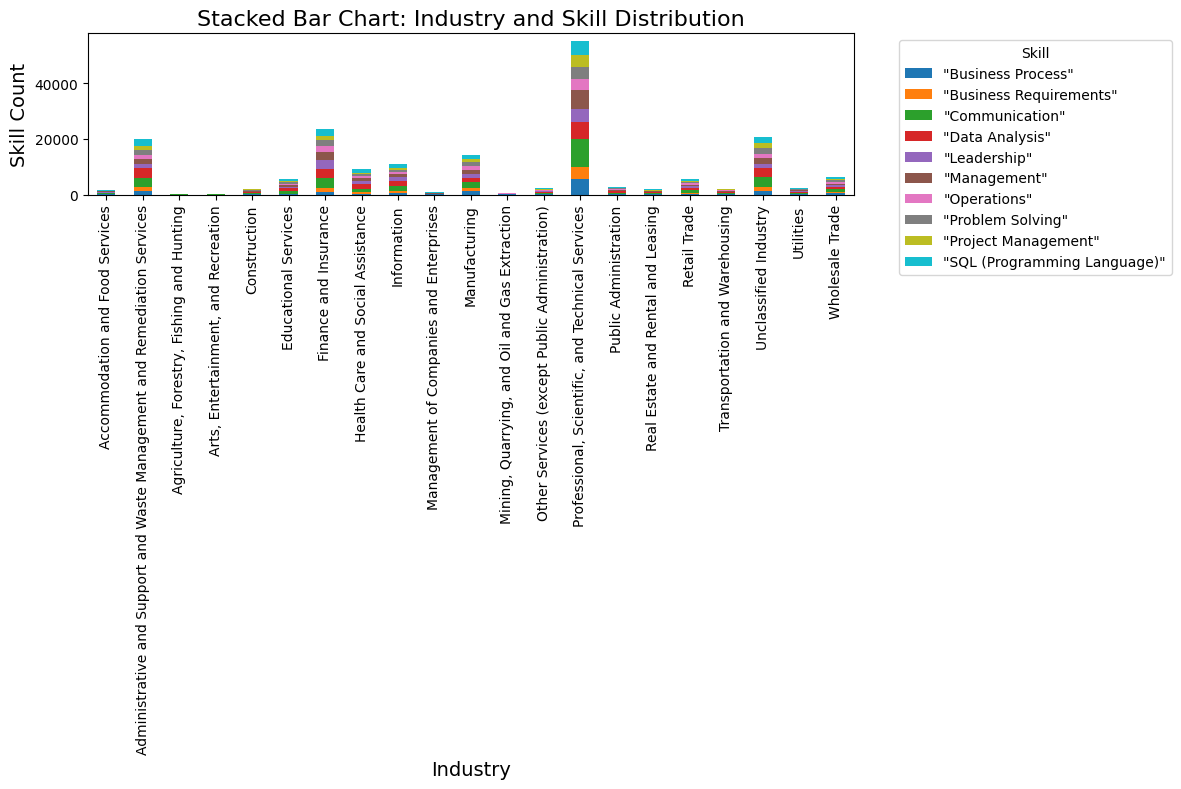

In [7]:
# Your code for 6th question here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 将 df DataFrame 中的 "SKILLS_NAME" 列的字符串数据按指定的分隔符 ",\n " 进行分割
df_split = df.withColumn("SKILLS_NAME", split(col("SKILLS_NAME"), ",\n  "))

# 去掉 SKILLS_NAME 列中每个字符串末尾的换行符
df_split = df_split.withColumn(
    "SKILLS_NAME",
    transform(
        col("SKILLS_NAME"),
        lambda x: regexp_replace(x, r'\n', '')  # 替换每个字符串末尾的换行符
    )
)

# 将每个数组元素展开为单独的行存放进skill列
df_exploded = df_split.withColumn("Skill", explode(col("SKILLS_NAME")))

# 对 df_exploded 进行分组，并对每组数据进行计数
df_aggregated = df_exploded.groupBy("NAICS2_NAME", "Skill").count()

# Convert the result to Pandas DataFrame for plotting
pdf = df_aggregated.toPandas()





# 计算每个技能的总数量
skill_count = pdf.groupby('Skill')['count'].sum().sort_values(ascending=False)

# 选择最多的前十个技能
top_skills = skill_count.head(10).index

# 过滤原始数据，只保留前十个技能
pdf_filtered = pdf[pdf['Skill'].isin(top_skills)]

# 聚合数据，根据NAICS2_NAME和Skill进行分组，计算每个组合的技能总数
pdf_grouped = pdf_filtered.groupby(['NAICS2_NAME', 'Skill'])['count'].sum().unstack(fill_value=0)

# 设置图形大小和分辨率
plt.figure(figsize=(19.2, 10.8), dpi=100)  # figsize 为 1920x1080 像素，dpi 为 100

# 绘制堆积条形图
plt.figure(figsize=(14, 10))
pdf_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))

# 设置标题和标签
plt.title('Stacked Bar Chart: Industry and Skill Distribution', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Skill Count', fontsize=14)

# 显示图例
plt.legend(title='Skill', bbox_to_anchor=(1.05, 1), loc='upper left')

# 调整边距，避免标签重叠
plt.subplots_adjust(top=0.9, bottom=0.15)

# 保存图像为 PNG 格式
plt.savefig('output/Q6.png', bbox_inches='tight')

# 显示图形
plt.tight_layout()
plt.show()


<Figure size 1400x1000 with 0 Axes>

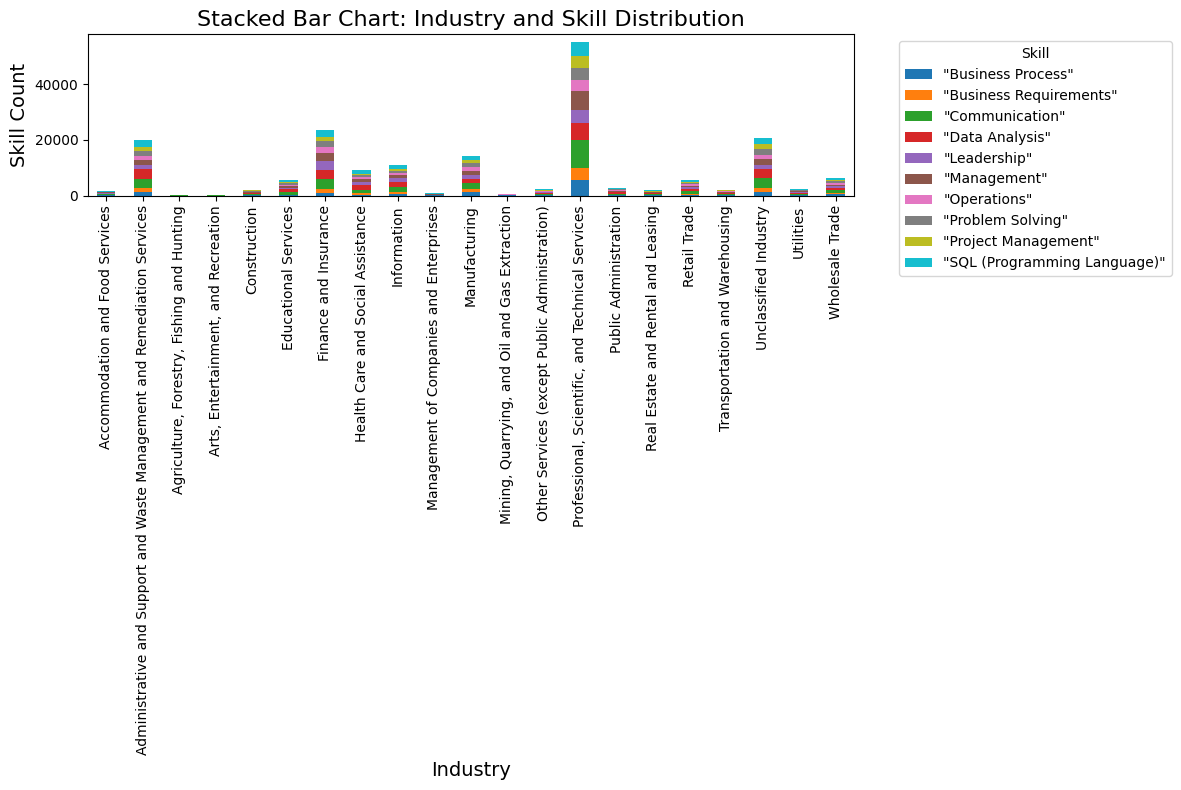

In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 假设pdf是你的DataFrame
# 例如，pdf = pd.read_csv('your_data.csv') 或者你已有的数据

# 计算每个技能的总数量
skill_count = pdf.groupby('Skill')['count'].sum().sort_values(ascending=False)

# 选择最多的前十个技能
top_skills = skill_count.head(10).index

# 过滤原始数据，只保留前十个技能
pdf_filtered = pdf[pdf['Skill'].isin(top_skills)]

# 聚合数据，根据NAICS2_NAME和Skill进行分组，计算每个组合的技能总数
pdf_grouped = pdf_filtered.groupby(['NAICS2_NAME', 'Skill'])['count'].sum().unstack(fill_value=0)

# 绘制堆积条形图
plt.figure(figsize=(14, 10))
pdf_grouped.plot(kind='bar', stacked=True, figsize=(12, 8))

# 设置标题和标签
plt.title('Stacked Bar Chart: Industry and Skill Distribution', fontsize=16)
plt.xlabel('Industry', fontsize=14)
plt.ylabel('Skill Count', fontsize=14)

# 显示图例
plt.legend(title='Skill', bbox_to_anchor=(1.05, 1), loc='upper left')

# 显示图形
plt.tight_layout()
plt.show()

![Question 6](output/Q6.png)

Because there are too many types of skills, the images cannot accommodate all of them, so I selected the top ten for drawing. The graph illustrates the distribution of various skills across different industries, highlighting that "Professional, Scientific, and Technical Services" industry has the highest skill count, particularly in "Data Analysis" and "Management". In contrast, industries like "Arts, Entertainment, and Recreation" and "Utilities" show lower skill counts across all categories.


# Salary Analysis by ONET Occupation Type (Bubble Chart)
- Analyze how salaries differ across ONET occupation types.
- **Aggregate Data**
  - Compute **median salary** for each occupation in the **ONET taxonomy**.
- **Visualize results**
  - Create a **bubble chart** where:
    - **X-axis** = `ONET_NAME`
    - **Y-axis** = `Median Salary`
    - **Size** = Number of job postings
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [ ]:
# Your code for 7th question here
from pyspark.sql import functions as F

df_aggregated = df.groupBy("ONET_NAME").agg(
    F.expr("percentile_approx(SALARY_FROM, 0.5)").alias("Median_Salary"),
    F.count("ID").alias("Job_Postings")
)
df_aggregated_pd = df_aggregated.toPandas()


fig = px.scatter(
    df_aggregated_pd,
    x="ONET_NAME",
    y="Median_Salary",
    size="Job_Postings",
    color="ONET_NAME", 
    title="Salary Analysis by ONET Occupation Type",
    labels={'ONET_NAME': 'ONET Occupation Type', 'Median_Salary': 'Median Salary'},
    color_continuous_scale="Viridis",
)

fig.update_layout(
    font=dict(family="Arial, sans-serif", size=14),
    showlegend=True,
    xaxis_title="ONET Occupation Type",
    yaxis_title="Median Salary",
    margin=dict(l=50, r=50, t=100, b=50),
    title_font_size=20, 
    title_x=0.2
)

fig.show()

fig.write_image("output/Q7.png", width=960, height=540, scale=2)

![Question 7](output/Q7.png)

There are only two types of data in ONET_NAME: 'Business Intelligence Analysts' and' null ', so this bubble chart only displays data from' Business Intelligence Analysts', and it shows that the median salary for Business Intelligence Analysts is $88,000. 

# Career Pathway Trends (Sankey Diagram)
- Visualize job transitions between different occupation levels.
- **Aggregate Data**
  - Identify career transitions between **SOC job classifications**.
- **Visualize results**
  - Create a **Sankey diagram** where:
    - **Source** = `SOC_2021_2_NAME`
    - **Target** = `SOC_2021_3_NAME`
    - **Value** = Number of transitions
  - Apply custom colors and font styles.
- **Explanation:** Write two sentences about what the graph reveals.

In [ ]:
# Your code for 8th question here
import pandas as pd
import plotly.graph_objects as go
from pyspark.sql import SparkSession
from pyspark.sql import functions as F


# 步骤 1: 汇总数据
# 统计 SOC_2021_2_NAME 和 SOC_2021_3_NAME 之间的转换次数
df_transitions = df.groupBy("SOC_2021_2_NAME", "SOC_2021_3_NAME").count()

# 转换为 Pandas DataFrame
df_transitions_pd = df_transitions.toPandas()
#如果数据量过大，桑基图可能会变得复杂。可以过滤掉转换次数较少的记录
df_transitions_pd = df_transitions_pd[df_transitions_pd["count"] > 10]

# 步骤 2: 创建桑基图
# 获取唯一的来源和目标节点
unique_sources = df_transitions_pd["SOC_2021_2_NAME"].unique()
unique_targets = df_transitions_pd["SOC_2021_3_NAME"].unique()

# 创建节点列表
nodes = list(unique_sources) + list(unique_targets)

# 创建节点索引映射
node_indices = {node: i for i, node in enumerate(nodes)}

# 创建桑基图的链接数据
links = {
    "source": [node_indices[source] for source in df_transitions_pd["SOC_2021_2_NAME"]],
    "target": [node_indices[target] for target in df_transitions_pd["SOC_2021_3_NAME"]],
    "value": df_transitions_pd["count"].tolist()
}

# 步骤 3: 创建桑基图
fig = go.Figure(go.Sankey(
    node=dict(
        pad=15,  # 节点之间的间距
        thickness=20,  # 节点厚度
        line=dict(color="black", width=0.5),  # 节点边框样式
        label=nodes,  # 节点标签
        color="blue"  # 节点颜色
    ),
    link=dict(
        source=links["source"],  # 来源节点索引
        target=links["target"],  # 目标节点索引
        value=links["value"],  # 转换次数
        color="rgba(0, 128, 0, 0.4)"  # 链接颜色
    )
))

# 步骤 4: 自定义布局和样式
fig.update_layout(
    title="Career Pathway Trends (Sankey Diagram)",
    font=dict(family="Arial", size=12, color="black"),
    plot_bgcolor="white",  # 背景颜色
    paper_bgcolor="white",  # 画布颜色
    xaxis=dict(showgrid=False),  # 隐藏 X 轴网格
    yaxis=dict(showgrid=False),  # 隐藏 Y 轴网格
    title_font_size=20, 
    title_x=0.5
)

# 显示桑基图
fig.show()

fig.write_image("output/Q8.png", width=1920, height=540, scale=2)

![Question 8](output/Q8.png)

There is only one type of data in both "SOC_2021_2 NAME" and "SOC_2021_3 NAME", so the generated Sankey diagram only has one line connecting Computer and Mathematical Occupations and Mathematical Science Occupations.